In [287]:
import Pkg;
# Pkg.add("BenchmarkTools");
using BenchmarkTools;
using LinearAlgebra;
# Pkg.add("DataStructures");
using DataStructures;
# Pkg.add("StatsBase");
using StatsBase;
# Pkg.add("Arpack");
using Arpack;
# Pkg.add("Plots")
using Plots;
# Pkg.add("Statistics");
using Statistics;
# Pkg.add("Plots");
using Plots;
# Pkg.add("LaTeXStrings");
using LaTeXStrings;

In [288]:
# for each precision we should first set it at the begginig of the code
setprecision(219)

219

In [289]:
function Π_func(q, qn, k, t, β, μ, N)
    
    E_k = Energy(k, t);
    E_kq = Energy(k .+ q, t);
    
    nF_k = FermiDirac(E_k, β, μ);
    nF_kq = FermiDirac(E_kq, β, μ);
    
    Π_q = 1/N * sum( (nF_k .- nF_kq) ./ (qn .+ E_k .- E_kq) );
    
    return Π_q
    
end

Π_func (generic function with 1 method)

In [290]:
function Energy(k, t)

    E_k = - 2*t * BigFloat.(cos.(k));
    return E_k
    
end

Energy (generic function with 1 method)

In [291]:
function FermiDirac(E_k, β, μ)

    nF_k = BigFloat.(1 ./ (1 .+ BigFloat.(exp.(β * (E_k .- μ)))));

end

FermiDirac (generic function with 1 method)

# Main

In [292]:
β = BigFloat(10);
η = BigFloat(0.01);
μ = BigFloat(0);
t = BigFloat(1);
N = 50;
L = 800;
k = BigFloat.(LinRange(-BigFloat(π), BigFloat(π), N));
ω = BigFloat.(LinRange(BigFloat(0), BigFloat(5), L));

In [293]:
# Π_EXACT = zeros(ComplexF64, L,1);

Π_EXACT = [Π_func(π, ω[i] + 1im * η, k, t, β, μ, N) for i=1:L];

In [294]:
A_array = -1/BigFloat(π) .* imag.(Π_EXACT);  # spectral density

In [129]:
gr()

Plots.GRBackend()

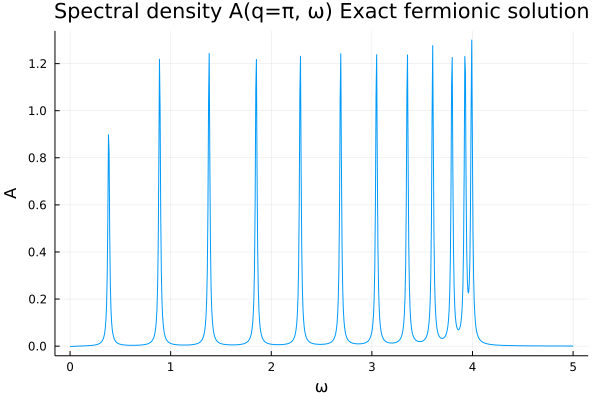

In [296]:
plot(ω, A_array, label = false)
title!("Spectral density A(q=π, ω) Exact fermionic solution")
xlabel!("ω")
ylabel!("A")

In [297]:
m = 30; #Matsubara points = (2m+1) 
qn = 1im * BigFloat(π)/β .* ((1:2:(4*m+1)) |> collect);
n_s = length(qn);

Gamma_z = [Π_func(π, qn[i], k, t, β, μ, N) for i=1:n_s]
    
M = [j <= (m+1) ? qn[i]^(j-1) : (- Gamma_z[i] * qn[i]^(j-(m+1))) for i=1:n_s, j=1:n_s];

In [298]:
Coef = M\ Gamma_z;

p_coefs = Coef[1:(m+1)];
q_coefs = Coef[(m+2):end];

In [299]:
Gamma_AC = [];

for j = 1:L
    Z = [(ω[j] + 1im * η) .^ i for i=1:m];
    Numinator = sum(p_coefs[2:end] .* Z) + p_coefs[1];
    Denominator = sum(q_coefs .* Z) + 1;
    push!(Gamma_AC, Numinator/Denominator)
end

In [300]:
A_pade = -1/BigFloat(π) .* imag.(Gamma_AC);

In [235]:
gr()

Plots.GRBackend()

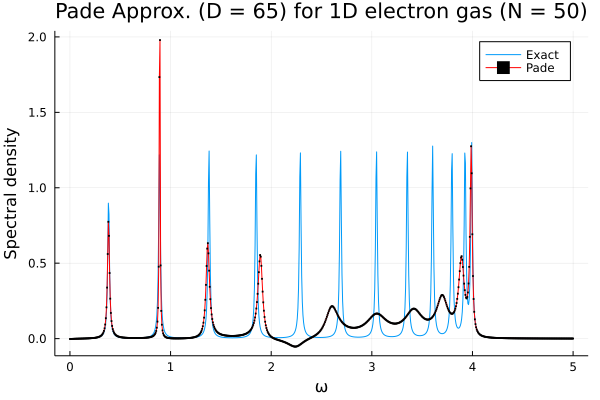

In [302]:
L1 = plot(ω, A_array, label = "Exact")
L2 = plot!(ω, A_pade, linecolor = "red", fillcolor = "black", markercolor = "black", markershape = :auto, markersize = 0.9, label = "Pade")

title!("Pade Approx. (D = 65) for 1D electron gas (N = 50)", fontsize = 8)
xlabel!("ω")
ylabel!("Spectral density")
